In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Context**

Although there have been lot of studies undertaken in the past on factors affecting life expectancy considering demographic variables, income composition and mortality rates. It was found that affect of immunization and human development index was not taken into account in the past. Also, some of the past research was done considering multiple linear regression based on data set of one year for all the countries. Hence, this gives motivation to resolve both the factors stated previously by formulating a regression model based on mixed effects model and multiple linear regression while considering data from a period of 2000 to 2015 for all the countries. Important immunization like Hepatitis B, Polio and Diphtheria will also be considered. In a nutshell, this study will focus on immunization factors, mortality factors, economic factors, social factors and other health related factors as well. Since the observations this dataset are based on different countries, it will be easier for a country to determine the predicting factor which is contributing to lower value of life expectancy. This will help in suggesting a country which area should be given importance in order to efficiently improve the life expectancy of its population.

**Content**

The project relies on accuracy of data. The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The data-sets are made available to public for the purpose of health data analysis. The data-set related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single data-set. On initial visual inspection of the data showed some missing values. As the data-sets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo, Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model data-set. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

**Acknowledgements**

The data was collected from WHO and United Nations website with the help of Deeksha Russell and Duan Wang.

**Inspiration**

The data-set aims to answer the following key questions:

1. Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy?
2. Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?
3. How does Infant and Adult mortality rates affect life expectancy?
4. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.
5. What is the impact of schooling on the lifespan of humans?
6. Does Life Expectancy have positive or negative relationship with drinking alcohol?
7. Do densely populated countries tend to have lower life expectancy?
8. What is the impact of Immunization coverage on life Expectancy?

In [10]:
file  =  pd.read_csv("Life Expectancy Data.csv")

In [11]:
file.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [12]:
file.tail()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358878,12222251.0,11.0,11.2,0.434,9.8


In [13]:
file.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [14]:
file.max(axis=0)

Country                                Zimbabwe
Year                                       2015
Status                               Developing
Life expectancy                            89.0
Adult Mortality                           723.0
infant deaths                              1800
Alcohol                                   17.87
percentage expenditure              19479.91161
Hepatitis B                                99.0
Measles                                  212183
 BMI                                       87.3
under-five deaths                          2500
Polio                                      99.0
Total expenditure                          17.6
Diphtheria                                 99.0
 HIV/AIDS                                  50.6
GDP                                 119172.7418
Population                         1293859294.0
 thinness  1-19 years                      27.7
 thinness 5-9 years                        28.6
Income composition of resources         

In [15]:
file.max(axis=1)

0       33736494.0
1         327582.0
2       31731688.0
3        3696958.0
4        2978599.0
           ...    
2933    12777511.0
2934    12633897.0
2935      125525.0
2936    12366165.0
2937    12222251.0
Length: 2938, dtype: float64

In [16]:
file.isnull()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2936,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [17]:
alcohol_content = file[['Country', 'Alcohol']]

Taking mean by using the groupby data.

In [24]:
alcohol_mean  = alcohol_content.groupby('Country').mean()

In [25]:
alcohol_mean

,Alcohol
Country,
Afghanistan,0.014375
Albania,4.848750
Algeria,0.406667
Angola,5.740667
Antigua and Barbuda,7.949333
...,...
Venezuela (Bolivarian Republic of),7.420000
Viet Nam,3.087333
Yemen,0.047333


## Pivot_table
Now we will do a transformation on the alcohol column and we will make a pivote table format. 

Now for that we will first take a short data set so we can see the all the column at once.

In [28]:
short_data = file[file["Year"]>2010]

In [29]:
short_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2922,Zimbabwe,2015,Developing,67.0,336.0,22,NaN,0.000000,87.0,0,...,88.0,NaN,87.0,6.2,118.693830,15777451.0,5.6,5.5,0.507,10.3
2923,Zimbabwe,2014,Developing,59.2,371.0,23,6.50,10.822595,91.0,0,...,92.0,6.44,91.0,6.3,127.474620,15411675.0,5.9,5.7,0.498,10.3
2924,Zimbabwe,2013,Developing,58.0,399.0,25,6.39,10.666707,95.0,0,...,95.0,6.88,95.0,6.8,111.227396,155456.0,6.2,6.0,0.488,10.4
2925,Zimbabwe,2012,Developing,56.6,429.0,26,6.09,92.602336,97.0,0,...,95.0,6.69,95.0,8.8,955.648466,1471826.0,6.5,6.4,0.464,9.8


Now we will transform our data into new pivot table format. In this pivot table we will use the Country as the index, Year as the column of the table and we will show the values as the values of alcohol column. 

This pivot table can be usefull in various situation whenever we want to find out relationship b/w two variable.

In [34]:
piv_alcohol = pd.pivot_table(file, values="Alcohol", index='Country', columns="Year")

In [36]:
piv_alcohol.head(15)

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Afghanistan,0.01,0.01,0.01,0.01,0.02,0.02,0.03,0.02,0.03,0.01,0.01,0.01,0.01,0.01,0.01,0.01
Albania,3.66,4.25,3.73,4.29,4.54,5.16,5.31,5.58,5.61,5.79,5.28,5.37,5.14,4.76,4.51,4.60
Algeria,0.25,0.23,0.36,0.34,0.45,0.50,0.36,0.44,0.46,0.50,0.45,0.56,0.66,0.53,0.01,NaN
Angola,1.85,2.58,2.82,3.49,3.53,5.04,5.84,6.35,7.07,7.01,7.80,8.06,8.24,8.10,8.33,NaN
Antigua and Barbuda,7.27,7.51,7.21,7.16,7.28,8.15,8.93,8.64,8.27,7.82,7.84,7.84,8.18,8.58,8.56,NaN
Argentina,7.68,7.76,7.81,7.62,7.63,7.53,7.75,8.16,8.41,8.33,8.15,8.11,8.35,8.28,7.93,NaN
Armenia,2.90,2.86,2.86,3.03,3.81,4.25,4.01,3.99,3.96,3.96,4.23,4.09,3.89,3.79,3.91,NaN
Australia,10.17,9.53,9.84,9.97,9.84,10.30,10.31,10.56,10.76,10.62,10.52,10.30,10.03,9.87,9.71,NaN
Austria,13.20,12.40,12.50,12.20,12.10,12.40,12.40,12.50,12.00,11.30,12.10,12.04,12.26,11.82,12.32,NaN


In the above dataset we can see that there are many NaN values, so if we want to do any computation on the dataset we need to remove all this NaN values or we can replace them by 0.

In [38]:
piv_alcohol.fillna(0, inplace=True)

In [40]:
piv_alcohol.head()

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,
Afghanistan,0.01,0.01,0.01,0.01,0.02,0.02,0.03,0.02,0.03,0.01,0.01,0.01,0.01,0.01,0.01,0.01
Albania,3.66,4.25,3.73,4.29,4.54,5.16,5.31,5.58,5.61,5.79,5.28,5.37,5.14,4.76,4.51,4.60
Algeria,0.25,0.23,0.36,0.34,0.45,0.50,0.36,0.44,0.46,0.50,0.45,0.56,0.66,0.53,0.01,0.00
Angola,1.85,2.58,2.82,3.49,3.53,5.04,5.84,6.35,7.07,7.01,7.80,8.06,8.24,8.10,8.33,0.00
Antigua and Barbuda,7.27,7.51,7.21,7.16,7.28,8.15,8.93,8.64,8.27,7.82,7.84,7.84,8.18,8.58,8.56,0.00


Now we will see the total sum of all the year value and also we will add this column into our database.

In [43]:
total_sum = piv_alcohol.sum(axis=1)
total_sum

Country
Afghanistan                             0.23
Albania                                77.58
Algeria                                 6.10
Angola                                 86.11
Antigua and Barbuda                   119.24
                                       ...  
Venezuela (Bolivarian Republic of)    111.30
Viet Nam                               46.31
Yemen                                   0.71
Zambia                                 33.59
Zimbabwe                               67.23
Length: 191, dtype: float64

In [44]:
piv_alcohol["Total"] = total_sum

In [45]:
piv_alcohol

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Total
Country,,,,,,,,,,,,,,,,,
Afghanistan,0.01,0.01,0.01,0.01,0.02,0.02,0.03,0.02,0.03,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.23
Albania,3.66,4.25,3.73,4.29,4.54,5.16,5.31,5.58,5.61,5.79,5.28,5.37,5.14,4.76,4.51,4.60,77.58
Algeria,0.25,0.23,0.36,0.34,0.45,0.50,0.36,0.44,0.46,0.50,0.45,0.56,0.66,0.53,0.01,0.00,6.10
Angola,1.85,2.58,2.82,3.49,3.53,5.04,5.84,6.35,7.07,7.01,7.80,8.06,8.24,8.10,8.33,0.00,86.11
Antigua and Barbuda,7.27,7.51,7.21,7.16,7.28,8.15,8.93,8.64,8.27,7.82,7.84,7.84,8.18,8.58,8.56,0.00,119.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),8.01,8.05,6.89,6.30,7.55,7.92,8.27,8.70,8.18,7.59,7.22,6.74,6.70,6.71,6.47,0.00,111.30
Viet Nam,1.60,1.84,2.03,2.19,2.86,2.70,2.56,3.01,3.58,3.86,3.93,3.94,4.12,4.00,4.09,0.00,46.31
Yemen,0.07,0.08,0.07,0.04,0.06,0.04,0.04,0.05,0.04,0.03,0.06,0.04,0.04,0.04,0.01,0.00,0.71


## Ranking
Now if we want to rearrange according to the ranking by year we can use the rank method on the above dataset.

By using raking method we can eaisly find the top most highly values columns and rows.

In [46]:
piv_alcohol.rank(ascending=False, method='first')

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Total
Country,,,,,,,,,,,,,,,,,
Afghanistan,175.0,173.0,175.0,175.0,174.0,175.0,174.0,177.0,175.0,178.0,177.0,175.0,125.0,127.0,96.0,6.0,179.0
Albania,89.0,82.0,92.0,82.0,78.0,73.0,76.0,73.0,76.0,73.0,80.0,80.0,72.0,74.0,60.0,4.0,72.0
Algeria,161.0,162.0,160.0,162.0,158.0,156.0,161.0,158.0,158.0,156.0,159.0,150.0,110.0,114.0,97.0,7.0,160.0
Angola,120.0,107.0,105.0,95.0,98.0,75.0,70.0,65.0,59.0,59.0,51.0,47.0,42.0,46.0,32.0,8.0,67.0
Antigua and Barbuda,47.0,44.0,47.0,47.0,49.0,41.0,35.0,44.0,47.0,48.0,50.0,49.0,44.0,38.0,29.0,9.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),40.0,38.0,52.0,62.0,47.0,45.0,45.0,42.0,49.0,51.0,57.0,62.0,60.0,59.0,49.0,187.0,48.0
Viet Nam,127.0,123.0,120.0,116.0,107.0,110.0,112.0,106.0,100.0,99.0,97.0,94.0,79.0,81.0,63.0,188.0,100.0
Yemen,170.0,170.0,171.0,173.0,173.0,174.0,173.0,174.0,174.0,177.0,174.0,172.0,124.0,126.0,181.0,189.0,175.0


## Plotting

Now we will plot a grap to show the total alcohol value in by using the graph.

<AxesSubplot:ylabel='Country'>

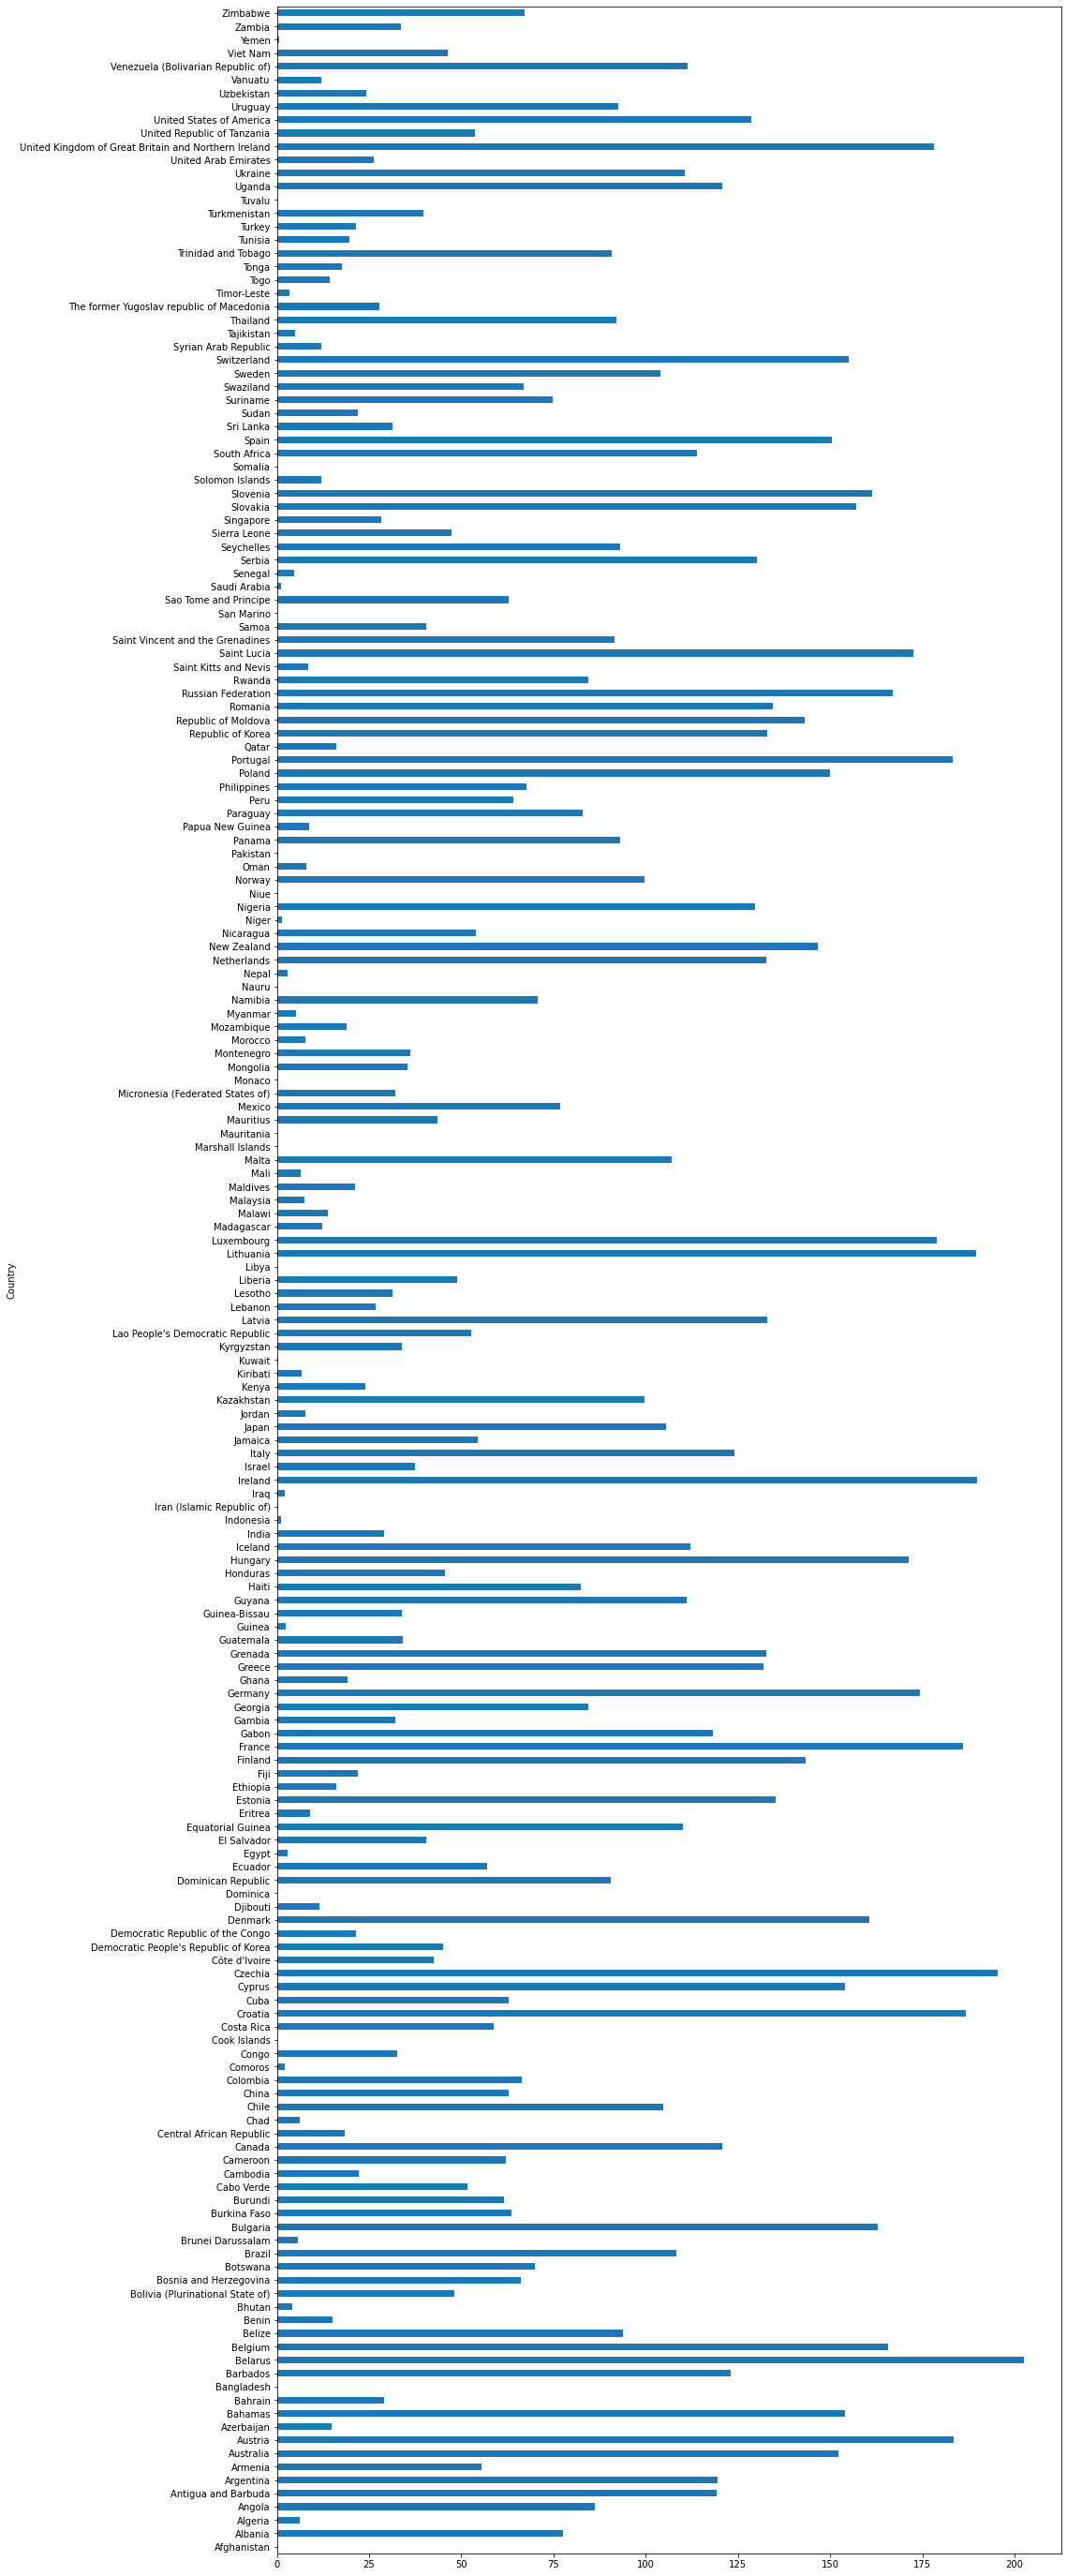

In [53]:
piv_alcohol.Total.plot(kind='barh', figsize=(15,50))

Now if we  to plot the data in order then we need to sort the series before plotting.

<AxesSubplot:ylabel='Country'>

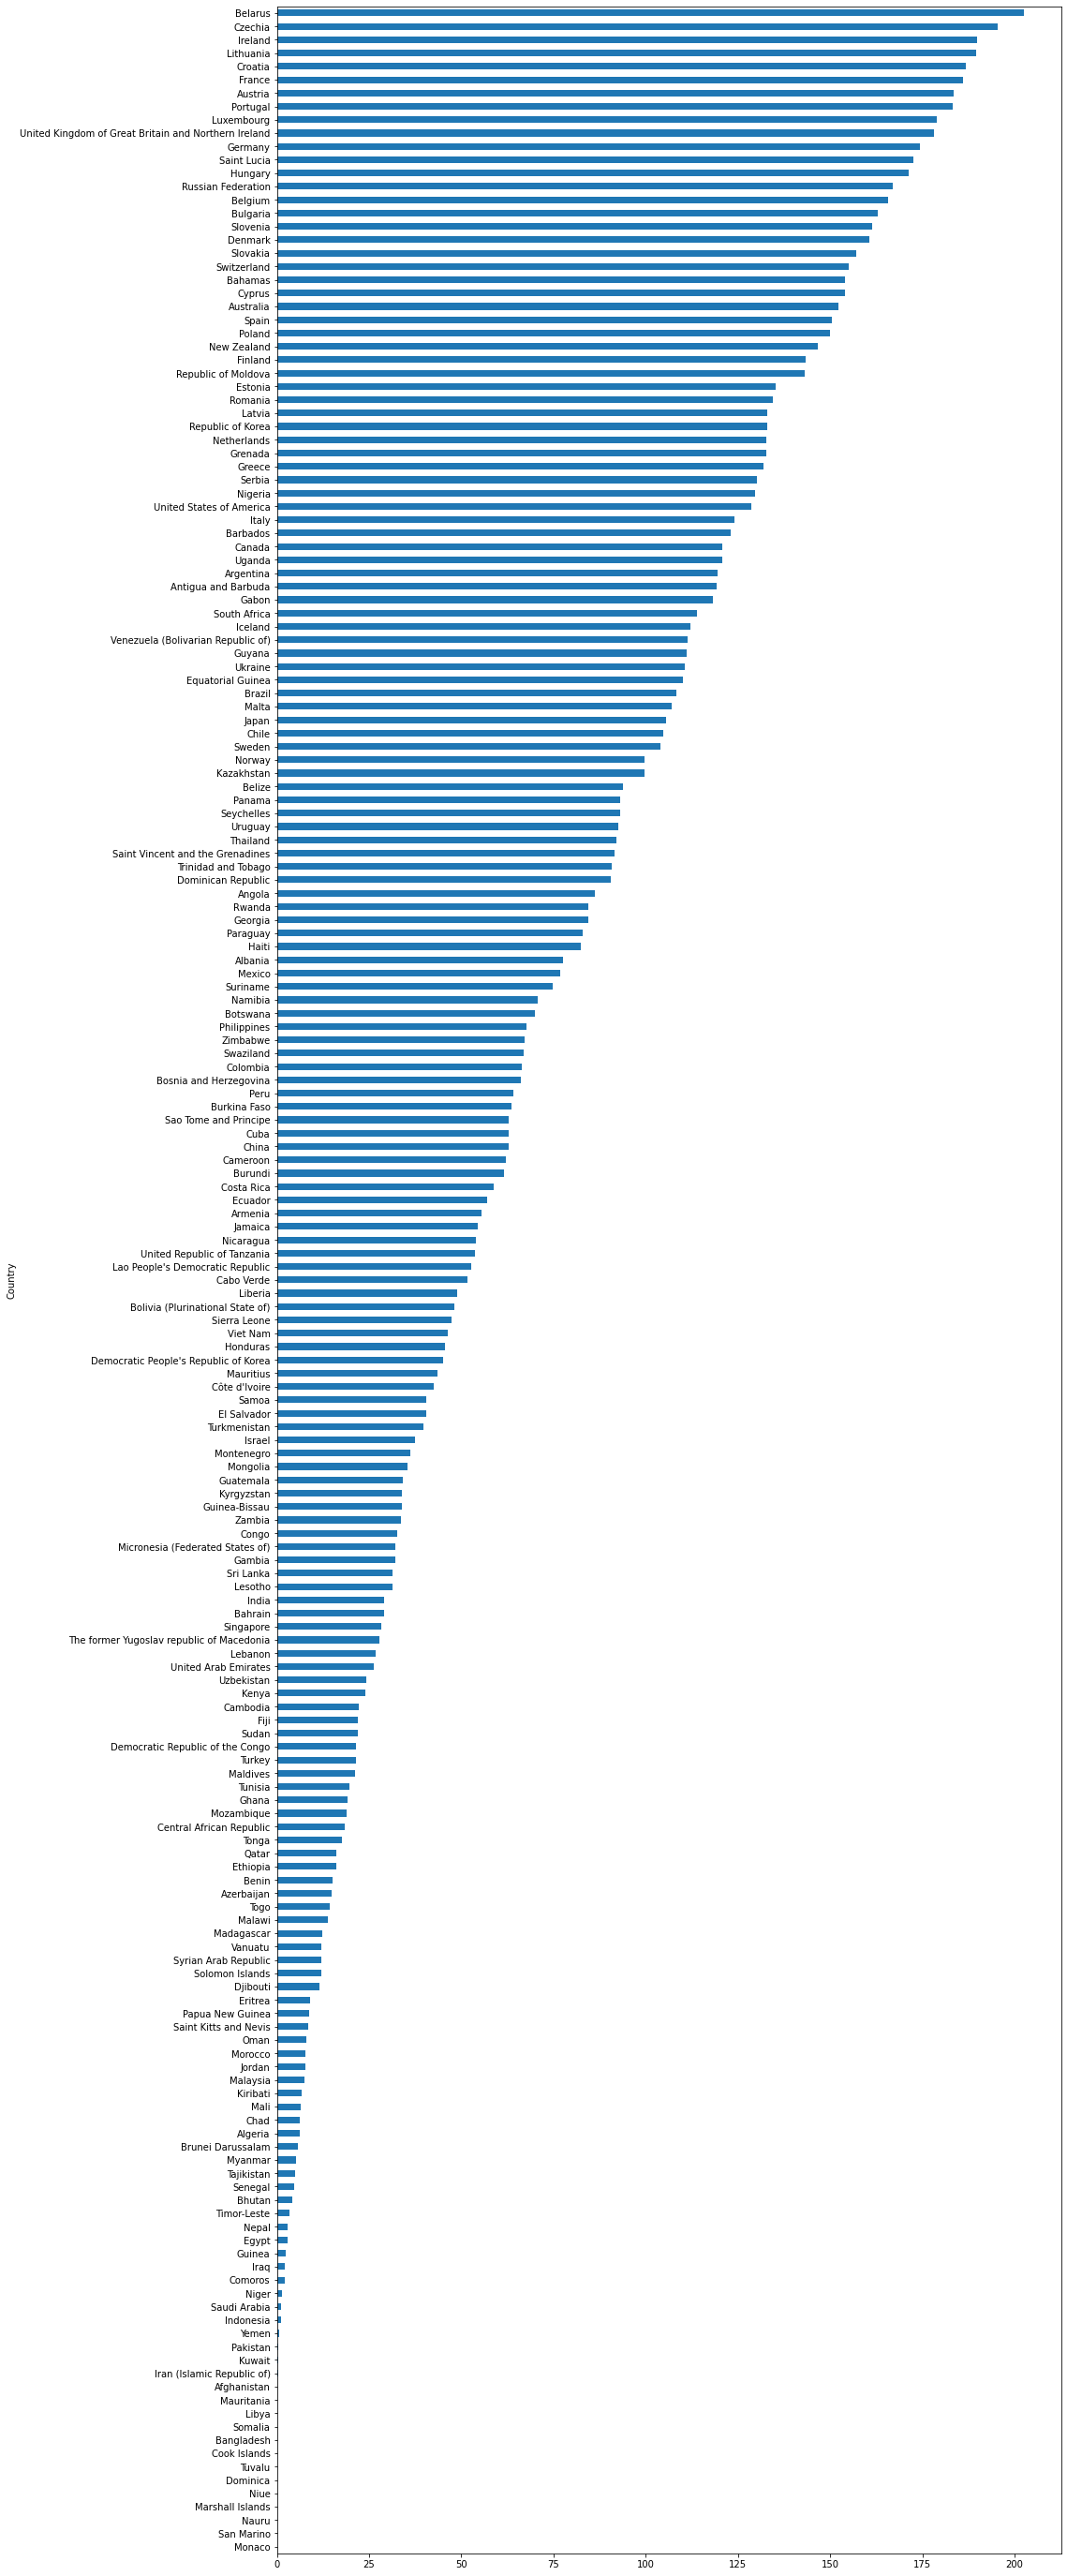

In [58]:
piv_alcohol.Total.sort_values().plot(kind='barh', figsize=(15,50))